In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # no more 'useless' red warnings 



In [3]:
mca = pd.read_csv('../files_for_lab/csv_files/customer_analysis_round_2.csv')
mca

Unnamed: 0  unnamed customer           state  customer_lifetime_value  \
0               0        0  DK49336         Arizona              4809.216960   
1               1        1  KX64629      California              2228.525238   
2               2        2  LZ68649      Washington             14947.917300   
3               3        3  XL78013          Oregon             22332.439460   
4               4        4  QA50777          Oregon              9025.067525   
...           ...      ...      ...             ...                      ...   
10905       10905    10905  FE99816          Nevada             15563.369440   
10906       10906    10906  KX53892          Oregon              5259.444853   
10907       10907    10907  TL39050         Arizona             23893.304100   
10908       10908    10908  WA60547      California             11971.977650   
10909       10909    10909  IV32877  no state given              6857.519928   

      response  coverage education effective_to_date employmentstatus  ...  \
0           No     Basic   College           2/18/11         Employed  ...   
1           No     Basic   College           1/18/11       Unemployed  ...   
2           No     Basic  Bachelor           2/10/11         Employed  ...   
3          Yes  Extended   College           1/11/11         Employed  ...   
4           No   Premium  Bachelor           1/17/11    Medical Leave  ...   
...        ...       ...       ...               ...              ...  ...   
10905       No   Premium  Bachelor           1/19/11       Unemployed  ...   
10906       No     Basic   College            1/6/11         Employed  ...   
10907       No  Extended  Bachelor            2/6/11         Employed  ...   
10908       No   Premium   College           2/13/11         Employed  ...   
10909  No_data     Basic  Bachelor            1/8/11       Unemployed  ...   

      number_of_policies     policy_type        policy renew_offer_type  \
0                      9  Corporate Auto  Corporate L3           Offer3   
1                      1   Personal Auto   Personal L3           Offer4   
2                      2   Personal Auto   Personal L3           Offer3   
3                      2  Corporate Auto  Corporate L3           Offer2   
4                      7   Personal Auto   Personal L2           Offer1   
...                  ...             ...           ...              ...   
10905                  7   Personal Auto   Personal L1           Offer3   
10906                  6   Personal Auto   Personal L3           Offer2   
10907                  2  Corporate Auto  Corporate L3           Offer1   
10908                  6   Personal Auto   Personal L1           Offer1   
10909                  3   Personal Auto   Personal L1           Offer4   

       sales_channel  total_claim_amount  vehicle_class  vehicle_size  \
0              Agent          292.800000  Four-Door Car       Medsize   
1        Call Center          744.924331  Four-Door Car       Medsize   
2        Call Center          480.000000            SUV       Medsize   
3             Branch          484.013411  Four-Door Car       Medsize   
4             Branch          707.925645  Four-Door Car       Medsize   
...              ...                 ...            ...           ...   
10905            Web         1214.400000     Luxury Car       Medsize   
10906         Branch          273.018929  Four-Door Car       Medsize   
10907            Web          381.306996     Luxury SUV       Medsize   
10908         Branch          618.288849            SUV       Medsize   
10909            Web         1021.719397            SUV       Medsize   

       vehicle_type month  
0           No_Type     2  
1           No_Type     1  
2                 A     2  
3                 A     1  
4           No_Type     1  
...             ...   ...  
10905             A     1  
10906             A     1  
10907       No_Type     2  
10908             A     2  
10909       No_Type    

In [4]:
response_sales_rate=[]
Response_Yes_Rate_By_Agent=0
Response_Yes_Rate_By_Call_Center=0
Response_Yes_Rate_By_Branch=0
Response_Yes_Rate_By_Web=0
Response_No_Rate_By_Agent=0
Response_No_Rate_By_Call_Center=0
Response_No_Rate_By_Branch=0
Response_No_Rate_By_Web=0
count_no_data=0
for i in range(0,len(mca['response'])):
    if mca['response'][i] == 'Yes':
        if mca['sales_channel'][i]== "Agent":
            Response_Yes_Rate_By_Agent+=1
        elif mca['sales_channel'][i]== "Call Center":
            Response_Yes_Rate_By_Call_Center+=1
        elif mca['sales_channel'][i]== "Branch":
            Response_Yes_Rate_By_Branch+=1
        elif mca['sales_channel'][i]== "Web":
            Response_Yes_Rate_By_Web+=1
    elif mca['response'][i]== "No":
        if mca['sales_channel'][i]== "Agent":
            Response_No_Rate_By_Agent+=1
        elif mca['sales_channel'][i]== "Call Center":
            Response_No_Rate_By_Call_Center+=1
        elif mca['sales_channel'][i]== "Branch":
            Response_No_Rate_By_Branch+=1
        elif mca['sales_channel'][i]== "Web":
            Response_No_Rate_By_Web+=1
    else:
        count_no_data+=1
        
print(Response_Yes_Rate_By_Agent,
        Response_Yes_Rate_By_Call_Center,
        Response_Yes_Rate_By_Branch,
        Response_Yes_Rate_By_Web,
        Response_No_Rate_By_Agent,
        Response_No_Rate_By_Call_Center,
        Response_No_Rate_By_Branch,
        Response_No_Rate_By_Web,
        count_no_data)



742 221 326 177 3148 1792 2539 1334 631


In [6]:
response_rate_by_sales_channel={
        "Response_No_Rate_By_Agent" : Response_No_Rate_By_Agent,
        "Response_No_Rate_By_Call_Center": Response_No_Rate_By_Call_Center,
        "Response_No_Rate_By_Branch" : Response_No_Rate_By_Branch,
        "Response_No_Rate_By_Web": Response_No_Rate_By_Web,
        "Response_Yes_Rate_By_Agent":Response_Yes_Rate_By_Agent,
        "Response_Yes_Rate_By_Call_Center":Response_Yes_Rate_By_Call_Center,
        "Response_Yes_Rate_By_Branch":Response_Yes_Rate_By_Branch,
        "Response_Yes_Rate_By_Web":Response_Yes_Rate_By_Web,
        }
response_rate_by_sales_channel

{'Response_No_Rate_By_Agent': 3148,
 'Response_No_Rate_By_Call_Center': 1792,
 'Response_No_Rate_By_Branch': 2539,
 'Response_No_Rate_By_Web': 1334,
 'Response_Yes_Rate_By_Agent': 742,
 'Response_Yes_Rate_By_Call_Center': 221,
 'Response_Yes_Rate_By_Branch': 326,
 'Response_Yes_Rate_By_Web': 177}

<BarContainer object of 8 artists>

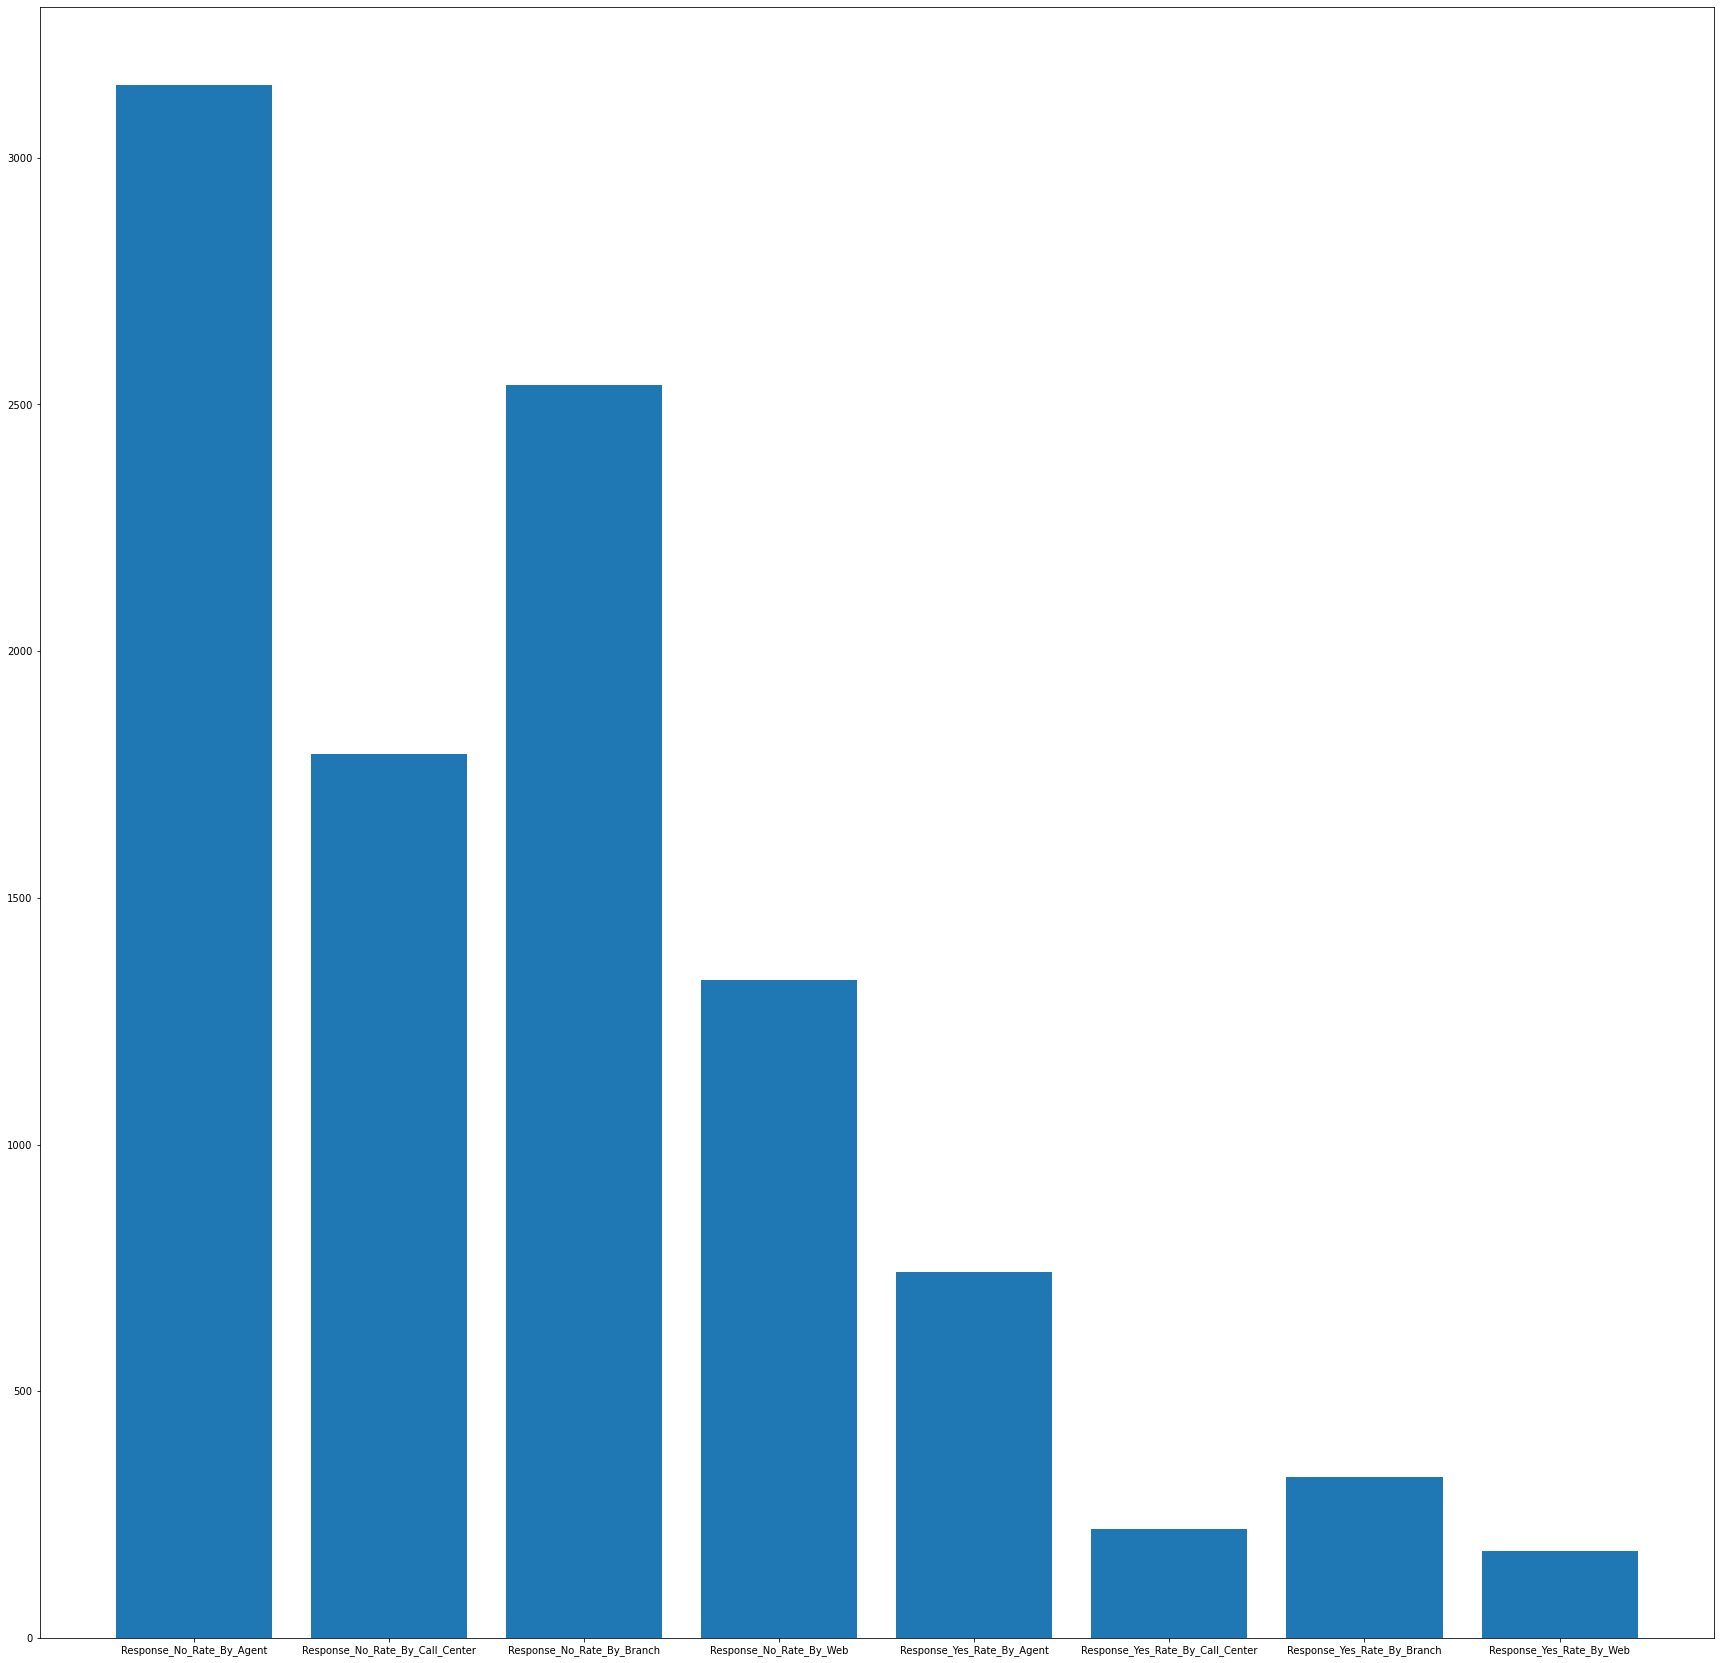

In [10]:
keys = response_rate_by_sales_channel.keys()
values = response_rate_by_sales_channel.values()
plt.figure(figsize=(30,30))
plt.bar(keys, values)